In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [146]:
for dirname, _, filenames in os.walk('/Users/envym/workplace/datathon'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/envym/workplace/datathon\ahlets_age_distribution.png
/Users/envym/workplace/datathon\athlete_events.csv
/Users/envym/workplace/datathon\athlets_height_distribution_polt.png
/Users/envym/workplace/datathon\athlets_height_weight_mean(group).png
/Users/envym/workplace/datathon\athlets_per_olympic_game(bar).png
/Users/envym/workplace/datathon\athlets_per_olympic_game(box).png
/Users/envym/workplace/datathon\athlets_per_olympic_game(scat).png
/Users/envym/workplace/datathon\athlets_per_olympic_game2(bar).png
/Users/envym/workplace/datathon\athlets_per_olympic_game2(scat).png
/Users/envym/workplace/datathon\athlets_weight_distribution.png
/Users/envym/workplace/datathon\countries(bronze).png
/Users/envym/workplace/datathon\countries(gold).png
/Users/envym/workplace/datathon\countries(silver).png
/Users/envym/workplace/datathon\datathon.ipynb
/Users/envym/workplace/datathon\datathon1.ipynb
/Users/envym/workplace/datathon\medal_per_olympic.png
/Users/envym/workplace/datathon\medal_per_s

In [147]:
# 소수점 두자리까지만 출력
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [148]:
# 파일 읽기
athletes = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")

In [149]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [150]:
athletes.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [151]:
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.00,261642.00,210945.00,208241.00,271116.00
mean,68248.95,25.56,175.34,70.70,1978.38
std,39022.29,6.39,10.52,14.35,29.88
min,1.00,10.00,127.00,25.00,1896.00
25%,34643.00,21.00,168.00,60.00,1960.00
50%,68205.00,24.00,175.00,70.00,1988.00
75%,102097.25,28.00,183.00,79.00,2002.00
max,135571.00,97.00,226.00,214.00,2016.00


In [152]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [153]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [154]:
regions.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [155]:
# 중복 표시

region_dup = regions[regions.duplicated(keep=False)]

In [156]:
athlete_dup = athletes[athletes.duplicated(keep=False)]
athlete_dup

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1251,704,Dsir Antoine Acket,M,27.00,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
1252,704,Dsir Antoine Acket,M,27.00,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4281,2449,William Truman Aldrich,M,48.00,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4282,2449,William Truman Aldrich,M,48.00,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.00,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.00,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269998,135073,Doris Clare Zinkeisen (-Johnstone),F,49.00,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.00,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
270199,135173,Henri Achille Zo,M,58.00,NaN,NaN,France,FRA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [157]:
# 중복 제거
athletes = athletes.drop_duplicates()

In [158]:
# 데이터 두개 병합
data = pd.merge(athletes, regions, on='NOC', how='left')

In [159]:
# 금메달 리스트의 나이 분포

gold_medalists = data[data.Medal == 'Gold']
gold_medalists.describe()

,ID,Age,Height,Weight,Year
count,13369.00,13222.00,10539.00,10254.00,13369.00
mean,69365.37,25.90,177.90,74.18,1973.15
std,39029.35,5.89,11.05,15.21,34.17
min,4.00,13.00,136.00,28.00,1896.00
25%,36060.00,22.00,170.00,63.00,1952.00
50%,69093.00,25.00,178.00,73.00,1984.00
75%,103707.00,29.00,185.00,84.00,2002.00
max,135553.00,64.00,223.00,170.00,2016.00


Text(0.5, 1.0, 'Distribution of Gold Medals')

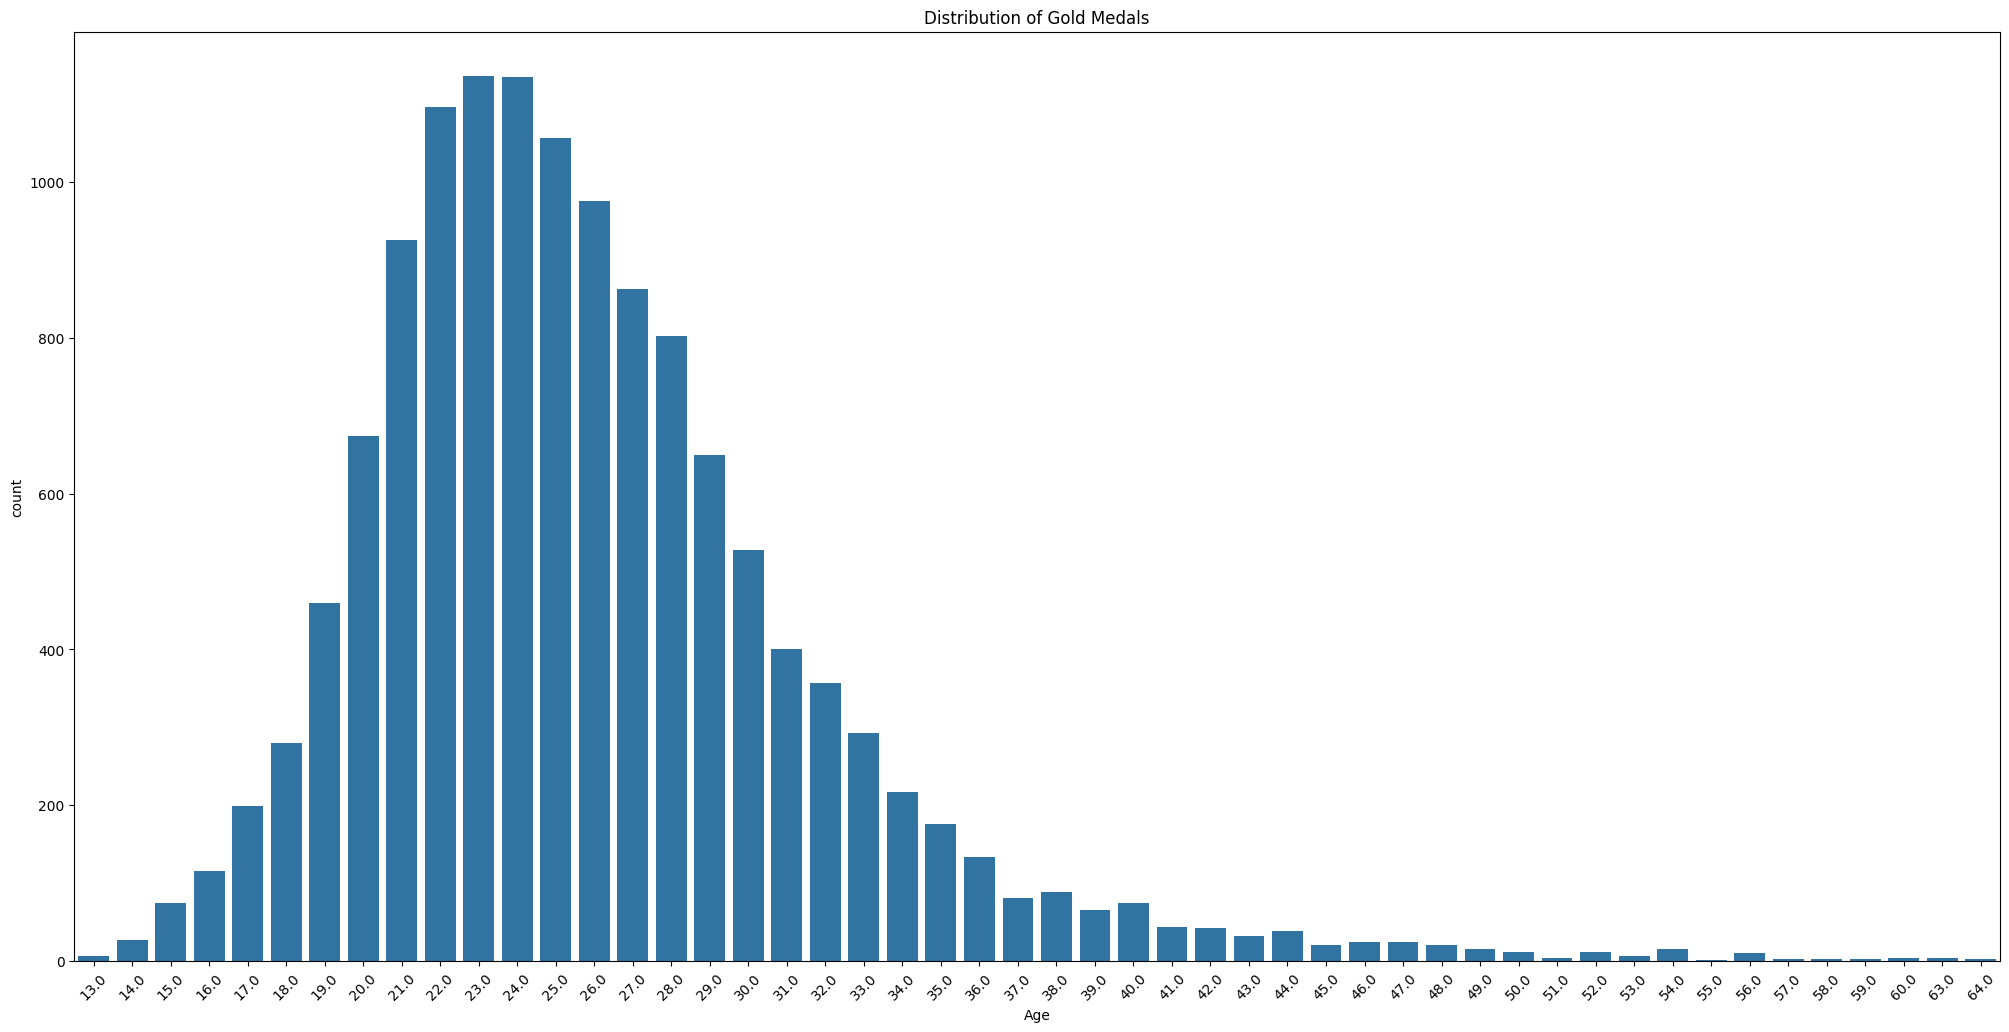

In [160]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.tight_layout()
sns.countplot(data=gold_medalists,x='Age')
plt.title('Distribution of Gold Medals')

Text(0.5, 1.0, 'Distribution of Gender')

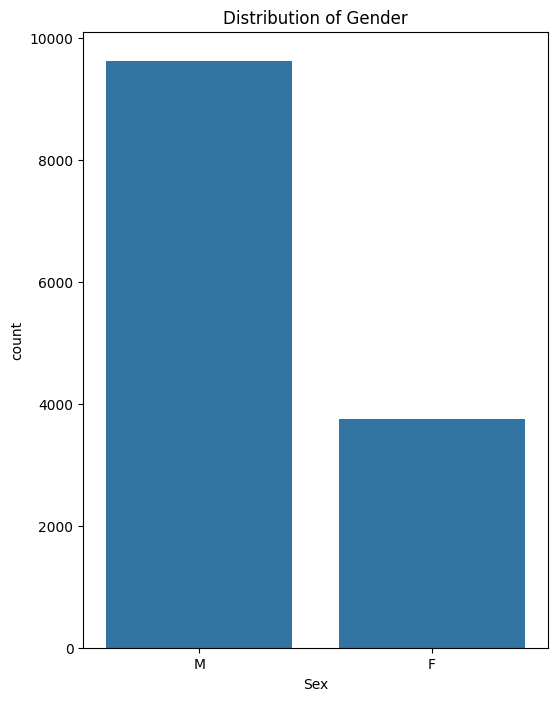

In [161]:
# 성별 분포
plt.figure(figsize=(6, 8))
plt.tight_layout()
sns.countplot(data=gold_medalists,x='Sex')
plt.title('Distribution of Gender')

In [162]:
# 메달 보유 상위 10개국

medal_country = gold_medalists.region.value_counts().reset_index(name='Medal').head(10)
medal_country

,region,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,677
4,Italy,575
5,France,499
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


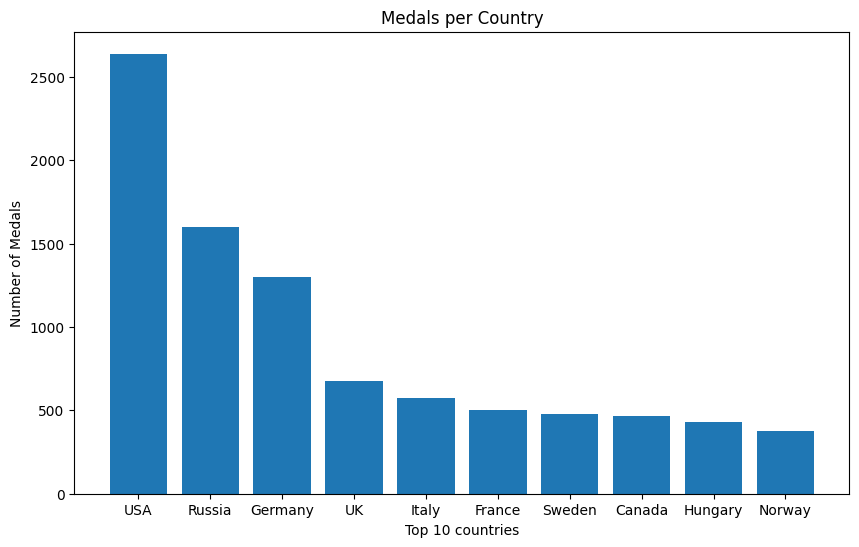

In [163]:
plt.figure(figsize=(10, 6))  
plt.bar(medal_country['region'], medal_country['Medal'])
plt.xlabel('Top 10 countries')
plt.ylabel('Number of Medals')
plt.title('Medals per Country')
plt.show()

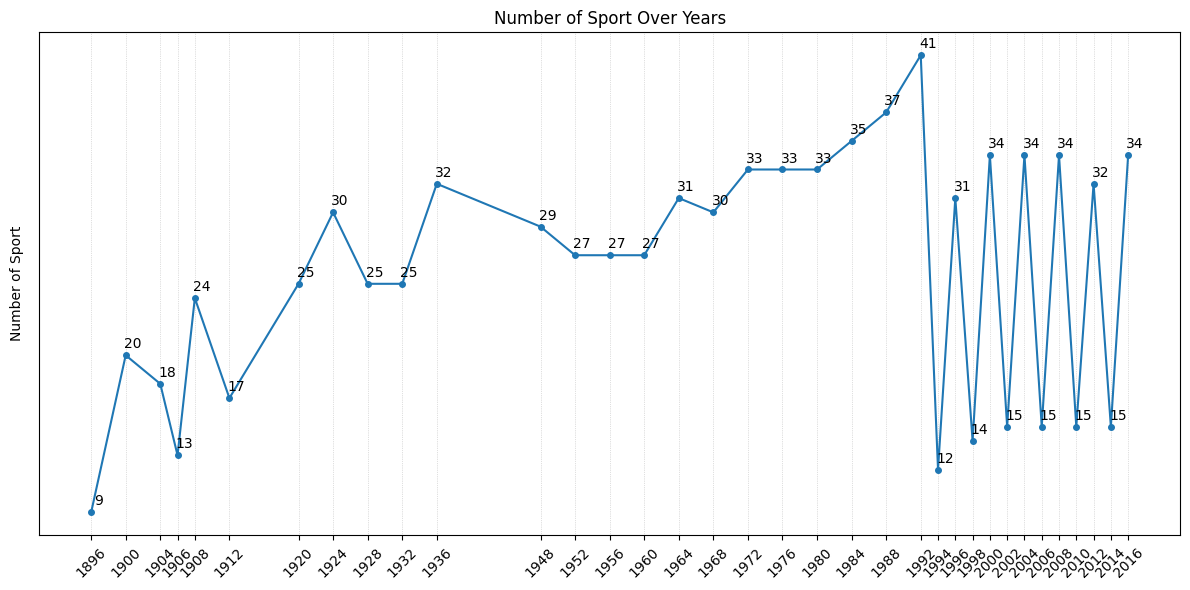

In [164]:
# 연도별 올림픽 종목 수
sport_count = data.loc[:,['Year','Sport']].drop_duplicates().groupby(['Year']).size().reset_index()
sport_count.columns = ['Year','Sport_Count'] 
plt.figure(figsize=(12,6))
plt.plot(sport_count['Year'],sport_count['Sport_Count'],marker ='o',markersize=4,label='Number of sports')

for i in range(len(sport_count)):
    plt.annotate(
        str(sport_count['Sport_Count'].iloc[i]),
        (sport_count['Year'].iloc[i], sport_count['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  
        ha='center'  
    )

plt.tick_params(axis='y', which='both', left=False, right=False)
plt.gca().axes.yaxis.set_ticklabels([])

plt.xticks(sport_count['Year'].unique(),rotation=45)
plt.grid(True, axis='x',linestyle='dotted',linewidth=0.5,color='gray',alpha=0.5)
plt.ylabel('Number of Sport')
plt.title('Number of Sport Over Years')
plt.tight_layout()
plt.show()

In [165]:
# 키와 몸무게 관계
height_weight = gold_medalists.loc[:,['Name','Sex','Height','Weight','Sport','region','Year','Season']].drop_duplicates().dropna()

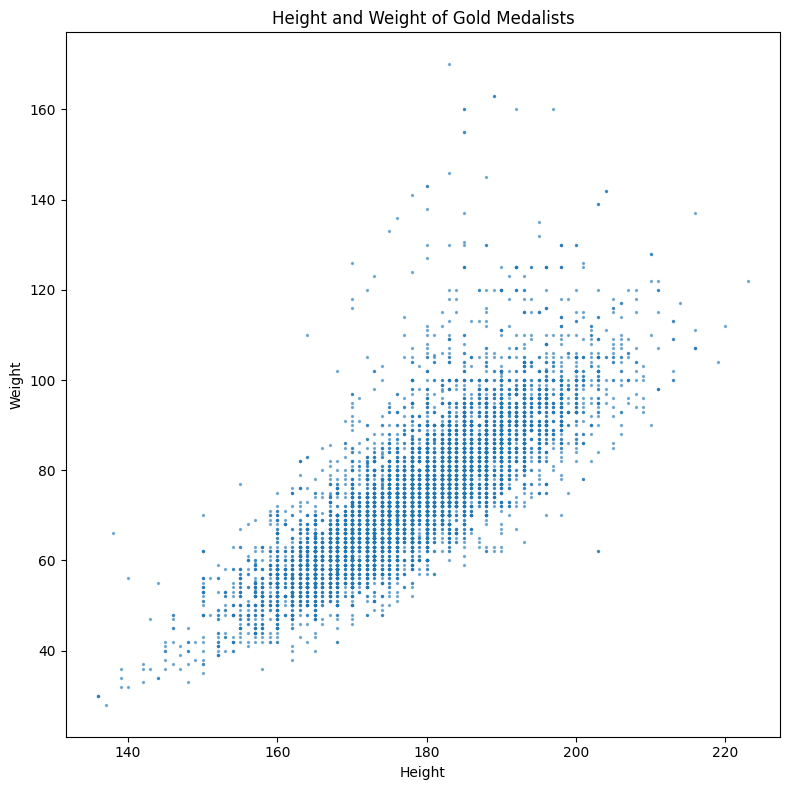

In [166]:
# 금메달 보유자의 키 몸무게
plt.figure(figsize=(8,8))
plt.scatter(height_weight['Height'],height_weight['Weight'],s=2,alpha=0.5)
plt.title('Height and Weight of Gold Medalists')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()

In [167]:
#표에 표시되지 않는 예외치
gold_medalists[(gold_medalists['Height'] >= 200) & (gold_medalists['Weight'] <=65)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
57115,29426,Anne Theresa Donovan,F,22.00,203.00,62.00,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Women's Basketball,Gold,USA,NaN
57116,29426,Anne Theresa Donovan,F,26.00,203.00,62.00,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Women's Basketball,Gold,USA,NaN


In [168]:
#표에 표시되지 않는 예외치
gold_medalists[(gold_medalists['Weight'] >= 160)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4401,2511,Vasily Ivanovich Alekseyev,M,30.00,185.00,160.00,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
4402,2511,Vasily Ivanovich Alekseyev,M,34.00,185.00,160.00,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
38987,20144,Andrey Ivanovich Chemerkin,M,24.00,183.00,170.00,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
207523,104740,Behdad Salimi Kordasiabi,M,22.00,192.00,160.00,Iran,IRI,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Iran,NaN
234282,118074,Lasha Talakhadze,M,22.00,197.00,160.00,Georgia,GEO,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Georgia,NaN
267280,134407,Leonid Ivanovych Zhabotynskiy,M,26.00,189.00,163.00,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
267281,134407,Leonid Ivanovych Zhabotynskiy,M,30.00,189.00,163.00,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


In [169]:
# 예외 수치 확인

# 금메달리스트 중 가장 어린 1%는 16세 이하
ages = gold_medalists['Age'].dropna()
np.percentile(ages,1)

16.0

In [170]:
# 16세 이하 금메달리스트
young_medalist = gold_medalists[gold_medalists.Age <= 16].groupby('Sport').size()
young_medalist

Sport
Athletics                      3
Bobsleigh                      1
Boxing                         1
Croquet                        2
Diving                        12
Fencing                        1
Figure Skating                 7
Football                       1
Gymnastics                    56
Judo                           1
Rhythmic Gymnastics            7
Rowing                        14
Sailing                        2
Shooting                       1
Short Track Speed Skating      3
Ski Jumping                    2
Speed Skating                  1
Swimming                     109
Tennis                         1
dtype: int64

In [171]:
# 금메달리스트 중 나이 많은 1%는 47세 이상
np.percentile(ages,99)

47.0

In [172]:
#47세 이상 금메달 리스트 
old_medalist = gold_medalists[gold_medalists.Age > 47].groupby('Sport').size()
old_medalist

Sport
Alpinism             4
Archery             12
Art Competitions    11
Bobsleigh            1
Croquet              1
Curling              3
Equestrianism       28
Fencing              3
Polo                 1
Roque                1
Sailing             25
Shooting            23
dtype: int64

In [173]:
#올림픽 역사상 가장 어린 금메달 리스트
min_age = data['Age'].min()
youngest = data[data.Age == min_age]
youngest

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
142104,71691,Dimitrios Loundras,M,10.00,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,NaN


In [174]:
#올림픽 역사상 가장 나이 많은 금메달 리스트
max_age = data['Age'].max()
oldest = data[data.Age == max_age]
oldest

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
255752,128719,John Quincy Adams Ward,M,97.00,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA,NaN


In [175]:
#동계 하계 올림픽 종목 수수
sport_number_season = data.loc[:,['Year','Season','Sport']].drop_duplicates().groupby(['Year','Season']).size().reset_index()
sport_number_season.columns = ['Year', 'Season', 'Sport_Count'] # change name of columns
sport_count_winter = sport_number_season[sport_number_season['Season'] == 'Winter']
sport_count_summer = sport_number_season[sport_number_season['Season'] == 'Summer']

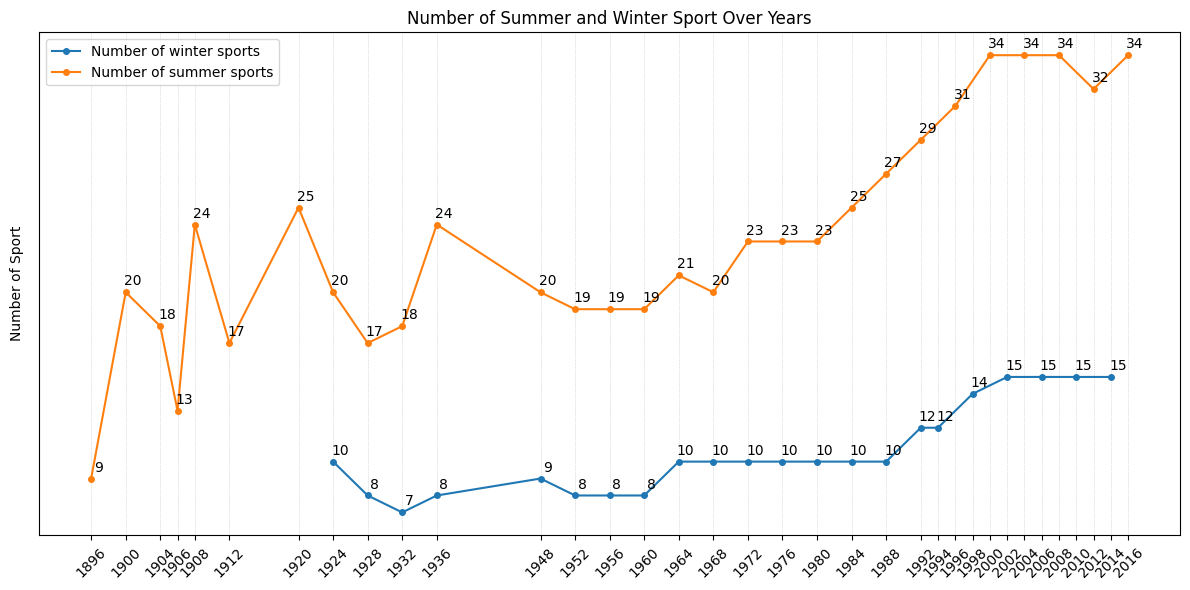

In [176]:
plt.figure(figsize=(12,6))
plt.plot(sport_count_winter['Year'],sport_count_winter['Sport_Count'],marker ='o', markersize=4,label='Number of winter sports')
plt.plot(sport_count_summer ['Year'],sport_count_summer ['Sport_Count'],marker ='o', markersize=4,label='Number of summer sports')

for i in range(len(sport_count_winter)):
    plt.annotate(
        str(sport_count_winter['Sport_Count'].iloc[i]),
        (sport_count_winter['Year'].iloc[i], sport_count_winter['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  
        ha='center'  
    )

for i in range(len(sport_count_summer)):
    plt.annotate(
        str(sport_count_summer['Sport_Count'].iloc[i]),
        (sport_count_summer['Year'].iloc[i], sport_count_summer['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  
        ha='center'  
    )

plt.tick_params(axis='y', which='both', left=False, right=False)
plt.gca().axes.yaxis.set_ticklabels([])

plt.xticks(sport_number_season['Year'].unique(),rotation=45)
plt.grid(True, which='both', axis='x', linestyle='dotted', linewidth=0.5, color='gray',alpha=0.5)
plt.ylabel('Number of Sport')
plt.legend()
plt.title('Number of Summer and Winter Sport Over Years')
plt.tight_layout()
plt.show()

In [177]:
summer_sport_over_year = data[data['Season'] == 'Summer'].loc[:, ['Year', 'Sport']].drop_duplicates().sort_values(by='Year')

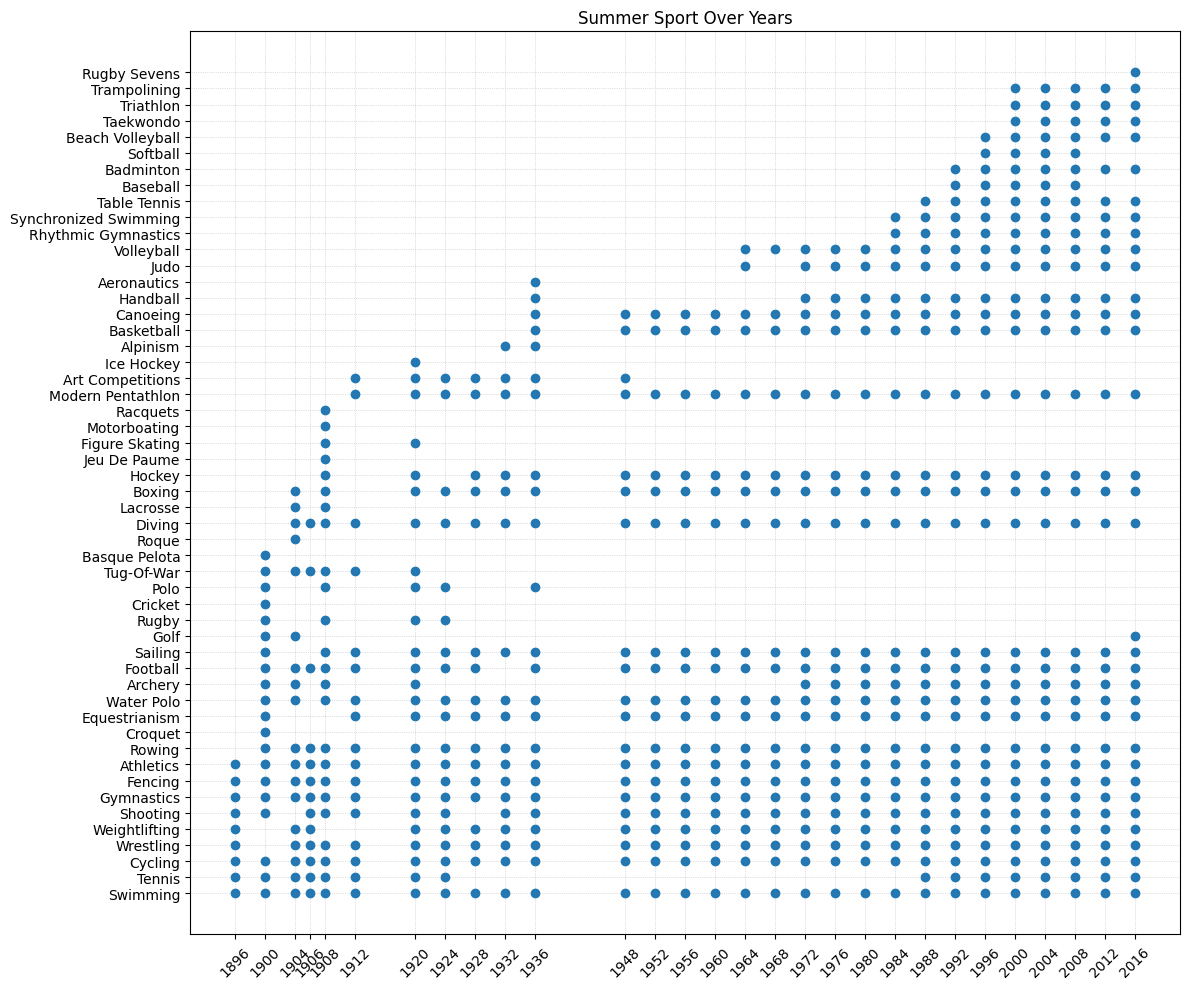

In [178]:
# 연도별 하계 올림픽 종목 변화
plt.figure(figsize=(12, 10))
plt.scatter(summer_sport_over_year['Year'], summer_sport_over_year['Sport'])
plt.xticks(summer_sport_over_year['Year'].unique(),rotation=45)
plt.grid(True, which='both', linestyle='dotted', linewidth=0.5, color='gray',alpha=0.5)
plt.title('Summer Sport Over Years')
plt.tight_layout()
plt.show()

In [179]:
#하계 올림픽 연도 종목
winter_sport_over_year = data[data['Season'] == 'Winter'].loc[:,['Year','Sport']].drop_duplicates().sort_values(by='Year')

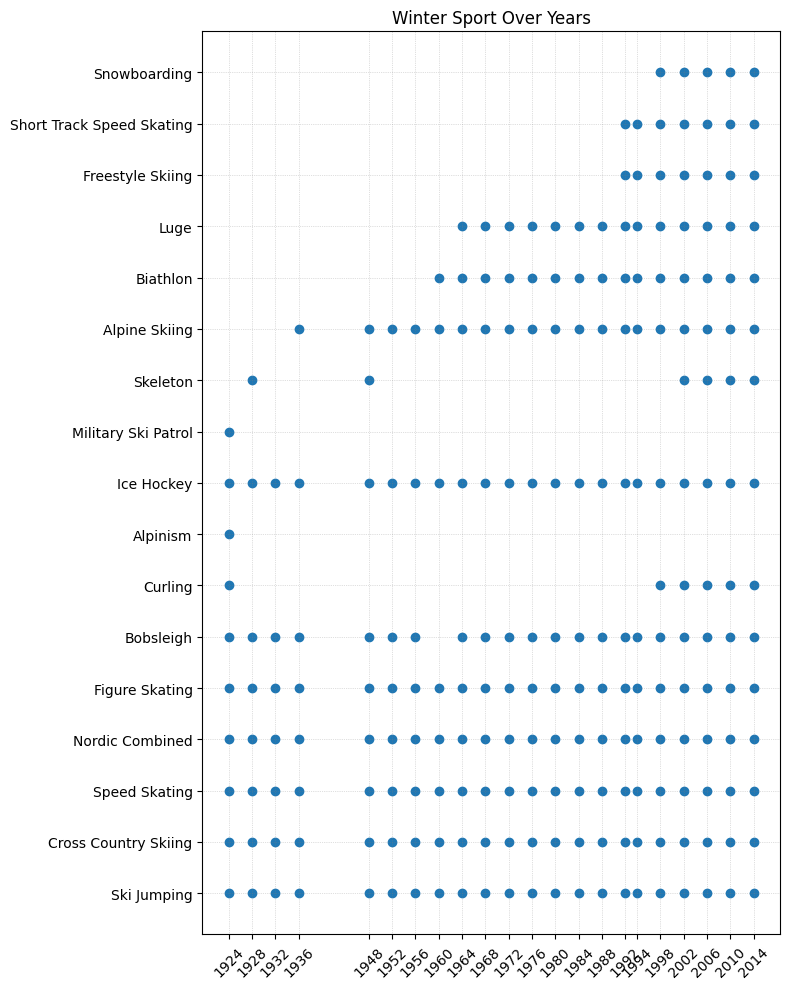

In [180]:
# 연도별 하계 올림픽 종목 변화
plt.figure(figsize=(8, 10))
plt.scatter(winter_sport_over_year['Year'], winter_sport_over_year['Sport'])
plt.xticks(winter_sport_over_year['Year'].unique(),rotation=45)
plt.grid(True, which='both', linestyle='dotted', linewidth=0.5, color='gray',alpha=0.5)
plt.title('Winter Sport Over Years')
plt.tight_layout()
plt.show()

In [181]:
# 남성 여성의 종목 수 

sport_count_sex = data.loc[:,['Year','Sex','Sport']].drop_duplicates().groupby(['Sex','Year']).size().reset_index() 
sport_count_sex.columns = ['Sex','Year','Sport_Count']
sport_count_male = sport_count_sex[sport_count_sex['Sex'] == 'M']
sport_count_female = sport_count_sex[sport_count_sex['Sex'] == 'F']

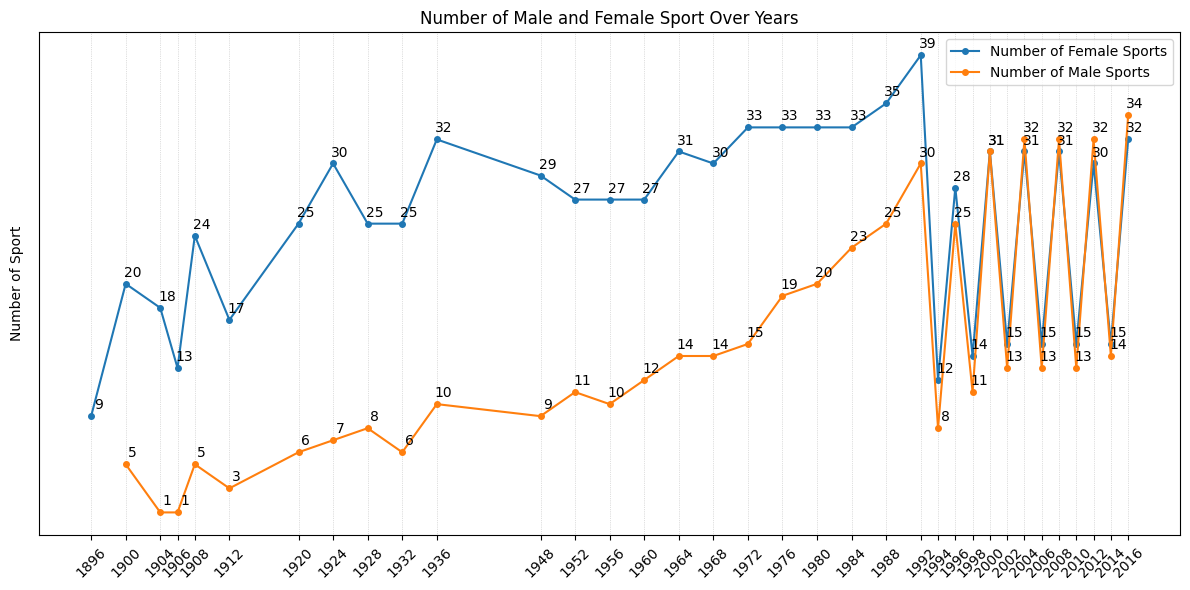

In [182]:
# 연도별 성별 종목 수 차이
plt.figure(figsize=(12,6))
plt.plot(sport_count_male['Year'],sport_count_male['Sport_Count'],marker='o',markersize=4,label='Number of Female Sports')
plt.plot(sport_count_female['Year'],sport_count_female['Sport_Count'],marker='o',markersize=4,label='Number of Male Sports')

for i in range(len(sport_count_male)):
    plt.annotate(
        str(sport_count_male['Sport_Count'].iloc[i]),
        (sport_count_male['Year'].iloc[i], sport_count_male['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  
        ha='center' 
    )

for i in range(len(sport_count_female)):
    plt.annotate(
        str(sport_count_female['Sport_Count'].iloc[i]),
        (sport_count_female['Year'].iloc[i], sport_count_female['Sport_Count'].iloc[i]),
        textcoords="offset points",
        xytext=(5,5),  
        ha='center'  
    )

plt.tick_params(axis='y', which='both', left=False, right=False)
plt.gca().axes.yaxis.set_ticklabels([])
plt.xticks(sport_count_sex['Year'].unique(),rotation=45)
plt.grid(True, which='both', axis='x', linestyle='dotted', linewidth=0.5, color='gray',alpha=0.5)
plt.ylabel('Number of Sport')
plt.legend()
plt.title('Number of Male and Female Sport Over Years')
plt.tight_layout()
plt.show()

In [183]:
# 국가별 금메달 변화(1994년 이후로)

gold_count_countries = (gold_medalists[gold_medalists.Year > 1992]
                        .loc[:,['region','Year']].groupby(['region','Year']).size().reset_index(name='Medal')
                        .sort_values(by=['Year','Medal'],ascending=[True,False])
                        .groupby(['Year']).head(5)
                        )
                        

countries = gold_count_countries['region'].unique()
years = gold_count_countries['Year'].unique()

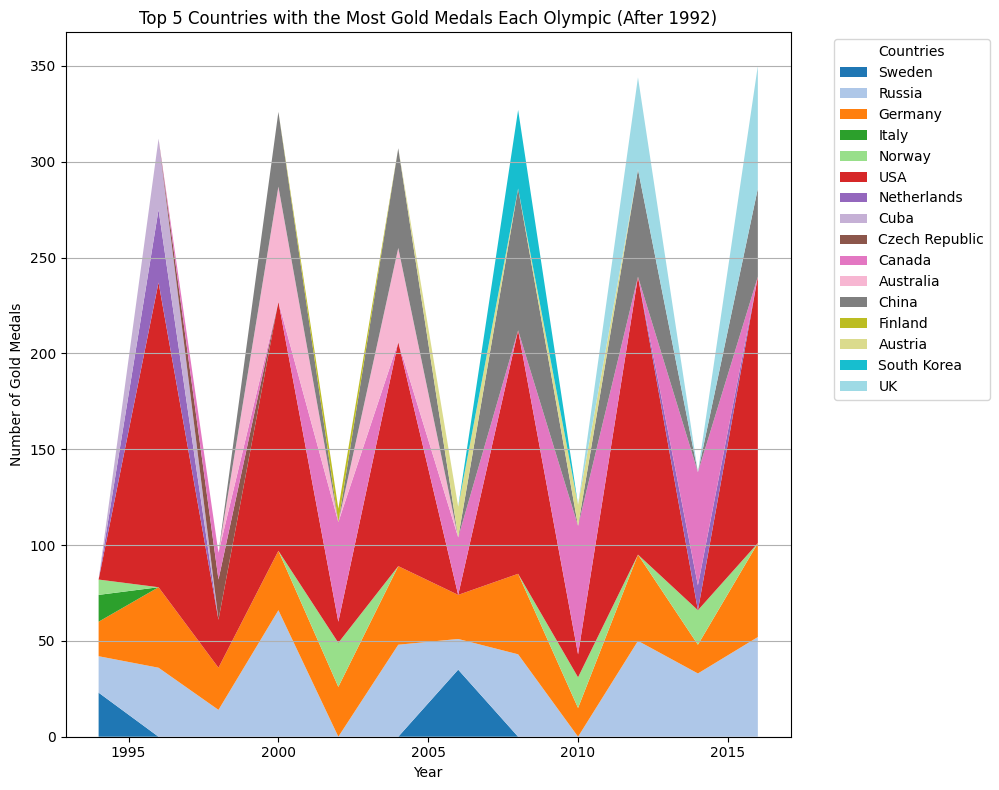

In [184]:
# 1994년 이후 상위 다섯개 국가
stack_data = np.zeros((len(countries), len(years)))

for i, country in enumerate(countries):
    country_data = gold_count_countries[gold_count_countries['region'] == country]
    country_data = country_data.set_index('Year').reindex(years, fill_value=0).reset_index()
    stack_data[i, :] = country_data['Medal'].values

fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.get_cmap('tab20', len(countries))

ax.stackplot(years, stack_data, labels=countries, colors=[colors(i) for i in range(len(countries))])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Gold Medals')
ax.set_title('Top 5 Countries with the Most Gold Medals Each Olympic (After 1992)')
ax.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, axis='y')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [185]:
# 종목별 최다 금메달 보유 국가 분류
top_countries = (gold_medalists.loc[:,['region','Sport']].groupby(['region','Sport']).size().reset_index(name='Medal')
                 .sort_values(['Sport', 'Medal'], ascending=[True, False])
                 .groupby('Sport').first().reset_index()
                 .sort_values('region',ascending=False)
                 )

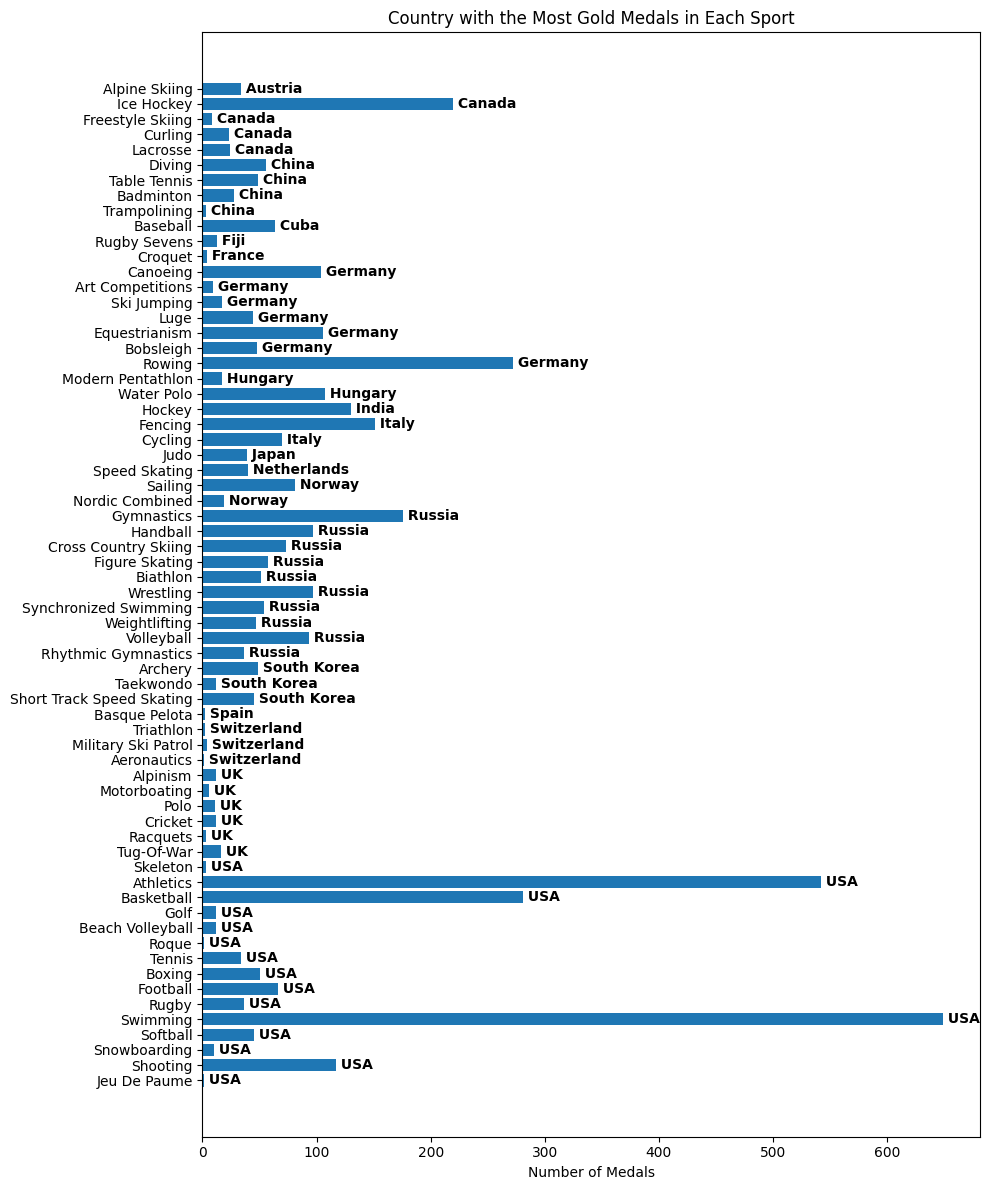

In [186]:
# 종목별 지배 국가
plt.figure(figsize=(10, 12))
plt.barh(top_countries['Sport'], top_countries['Medal'])

# Annotate with country names
for index, value in enumerate(top_countries['Medal']):
    plt.text(value, index, f' {top_countries["region"].iloc[index]}', va='center', ha='left', fontweight='bold')

plt.xlabel('Number of Medals')
plt.title('Country with the Most Gold Medals in Each Sport')
plt.tight_layout()
plt.show()

In [187]:
# 종목 집중(역도, 체조, 복싱)
top_countries_over_years = (gold_medalists.loc[:,['Year','region','Sport']].groupby(['Year','region','Sport']).size().reset_index(name='Medal')
                 .sort_values(['Year','Sport', 'Medal'], ascending=[True,True, False])
                 .groupby(['Year','Sport']).first().reset_index()
)

wl_gym_box = (top_countries_over_years[(top_countries_over_years.Sport == 'Weightlifting')
                                       | (top_countries_over_years.Sport == 'Gymnastics')
                                       | (top_countries_over_years.Sport == 'Boxing')]
              )

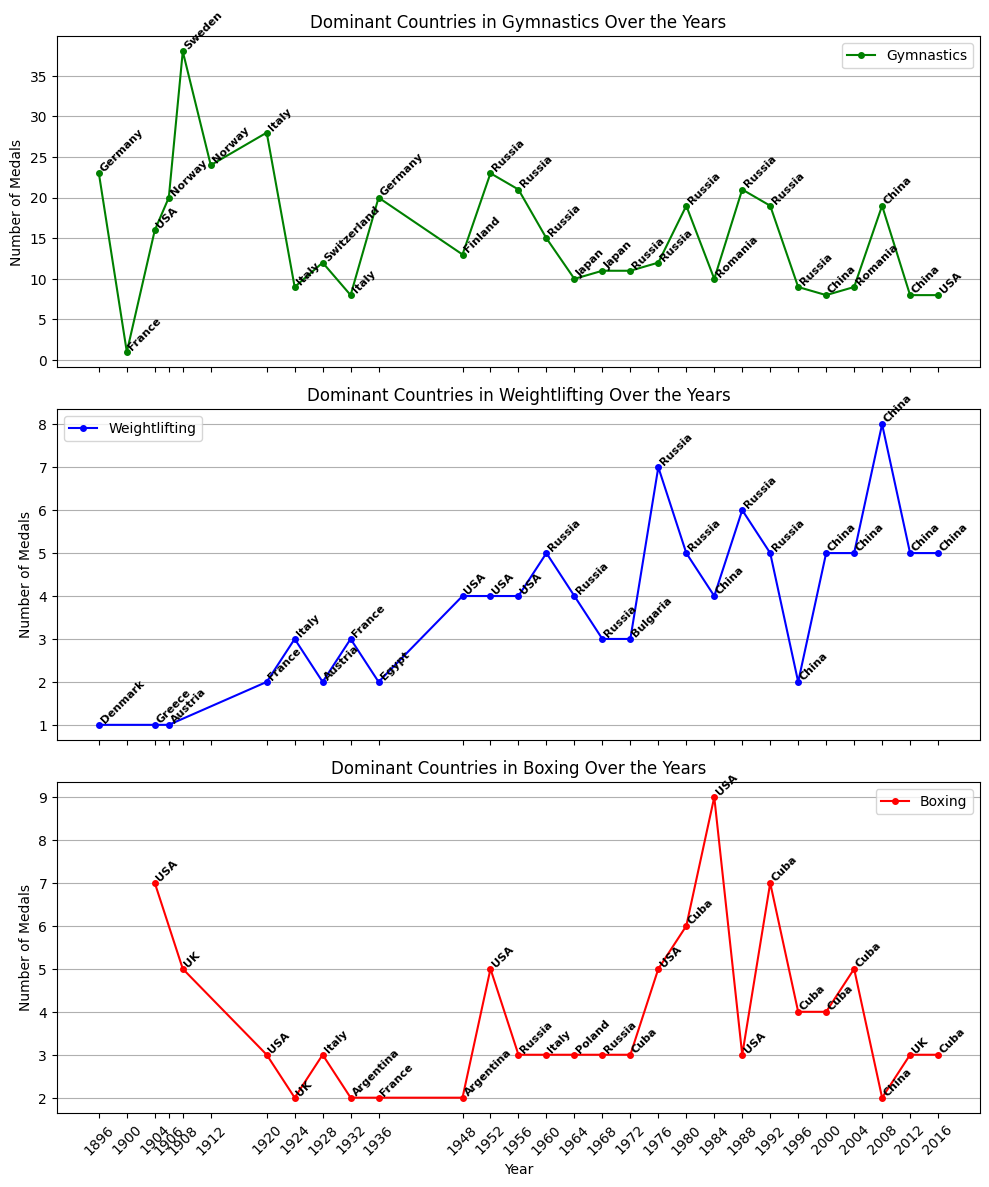

In [188]:
#연도별 역도 체조 복싱의 최강 국가
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

colors = {'Weightlifting': 'blue', 'Gymnastics': 'green', 'Boxing': 'red'}

for ax, sport in zip(axes, wl_gym_box['Sport'].unique()):
    sport_data = wl_gym_box[wl_gym_box['Sport'] == sport]
    ax.plot(sport_data['Year'], sport_data['Medal'], marker='o',markersize=4, color=colors[sport], label=sport)

    # Annotate the plot with country names
    for i in range(len(sport_data)):
        ax.text(sport_data.iloc[i]['Year'], sport_data.iloc[i]['Medal'], sport_data.iloc[i]['region'], 
                fontsize=8, verticalalignment='bottom',rotation= 45,fontweight='bold')

    ax.set_ylabel('Number of Medals')
    ax.set_title(f'Dominant Countries in {sport} Over the Years')
    ax.legend()
    ax.grid(True, axis='y')

plt.xlabel('Year')
plt.xticks(wl_gym_box['Year'].unique(), rotation=45)
plt.tight_layout()

plt.show()

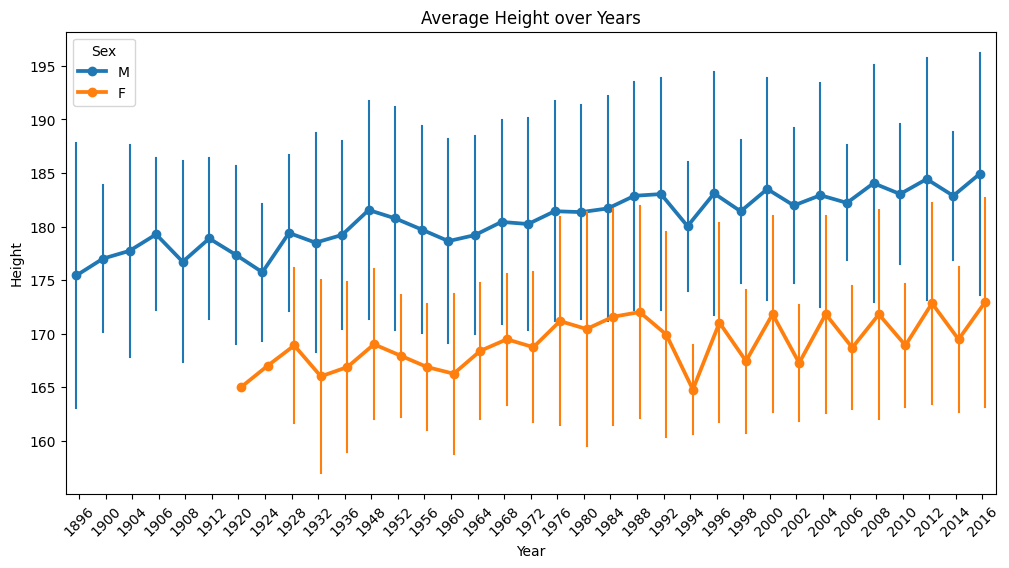

In [189]:
# 평균 키와 몸무게
plt.figure(figsize=(12,6))
sns.pointplot(
    data=height_weight,
    x='Year',
    y='Height',
    hue='Sex',
    dodge=0.2,
    errorbar='sd',
    err_kws={'linewidth': 1.5},  
    markersize=5  
).set_title('Average Height over Years')    
plt.xticks(rotation=45)
plt.show()

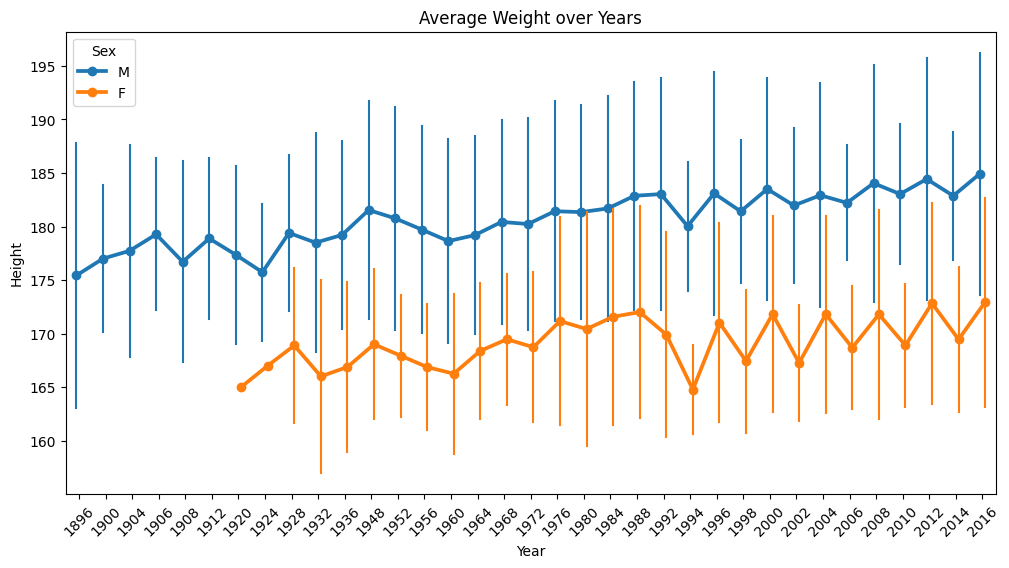

In [190]:
plt.figure(figsize=(12,6))
sns.pointplot(
    data=height_weight,
    x='Year',
    y='Height',
    hue='Sex',
    dodge=0.2,
    errorbar='sd',
    err_kws={'linewidth': 1.5},  
    markersize=5
).set_title('Average Weight over Years')   
plt.xticks(rotation=45)
plt.show()

In [191]:
#결측치
gold_medalists[(gold_medalists.Year == 1920) & (gold_medalists.Sex == 'F')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
23181,12248,Ethelda Marguerite Bleibtrey (-Schlatke),F,18.00,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Women's 100 metres Freestyle,Gold,USA,NaN
23182,12248,Ethelda Marguerite Bleibtrey (-Schlatke),F,18.00,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Women's 300 metres Freestyle,Gold,USA,NaN
23183,12248,Ethelda Marguerite Bleibtrey (-Schlatke),F,18.00,NaN,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
42314,21927,Anna Stefanie Nanny Fryland Clausen (-Fryland),F,20.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Plain High,Gold,Denmark,NaN
85541,43622,Irene May Guest (-Loog),F,19.00,157.00,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
104973,53409,Ludovika Antje Margareta Jakobsson-Eilers,F,35.00,165.00,58.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Figure Skating,Figure Skating Mixed Pairs,Gold,Finland,NaN
110565,56258,Magda Maria Henrietta Julin (Mauroy-),F,25.00,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Figure Skating,Figure Skating Women's Singles,Gold,Sweden,NaN
135884,68705,Suzanne Rachel Flore Lenglen,F,20.00,NaN,NaN,France,FRA,1920 Summer,1920,Summer,Antwerpen,Tennis,Tennis Women's Singles,Gold,France,NaN
135885,68705,Suzanne Rachel Flore Lenglen,F,20.00,NaN,NaN,France-3,FRA,1920 Summer,1920,Summer,Antwerpen,Tennis,Tennis Mixed Doubles,Gold,France,NaN
153824,77653,"Kathleen ""Kitty"" McKane (-Godfree)",F,23.00,NaN,NaN,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Tennis,Tennis Women's Doubles,Gold,UK,NaN


In [192]:
#결측치
gold_medalists[(gold_medalists.Year == 1924) & (gold_medalists.Sex == 'F')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
16182,8720,Sybil Lorina Bauer,F,20.00,NaN,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 100 metres Backstroke,Gold,USA,NaN
17184,9225,"Elizabeth Anna ""Betty"" Becker-Pinkston (-Campb...",F,21.00,155.00,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Diving,Diving Women's Springboard,Gold,USA,NaN
57074,29401,"Euphrasia Louise ""Fraze"" Donnelly (-Bungard, -...",F,18.00,163.00,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
60964,31394,"Gertrude Caroline ""Trudy"" Ederle",F,18.00,167.00,64.00,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
63358,32641,Helene Engelmann (-Jaroschka),F,25.00,NaN,NaN,Austria,AUT,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Mixed Pairs,Gold,Austria,NaN
129881,65742,Ethel Minnie Lackie (-Watkins),F,17.00,NaN,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 100 metres Freestyle,Gold,USA,NaN
129882,65742,Ethel Minnie Lackie (-Watkins),F,17.00,NaN,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
163145,82356,Lucy Morton (-Heaton),F,26.00,NaN,NaN,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 200 metres Breaststroke,Gold,UK,NaN
171973,86922,"Martha (Mrta) Maria Norelius (-McAllister, -Wr...",F,15.00,NaN,NaN,United States,USA,1924 Summer,1924,Summer,Paris,Swimming,Swimming Women's 400 metres Freestyle,Gold,USA,NaN
177553,89754,Ellen Ottilia Osiier (Thomsen-),F,33.00,168.00,NaN,Denmark,DEN,1924 Summer,1924,Summer,Paris,Fencing,"Fencing Women's Foil, Individual",Gold,Denmark,NaN
